In [3]:
# data-path
DATA_PATH = "/src/data/"

In [10]:
import numpy as np
import os
import pickle


def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


def load_cifar10(DATA_ID):

    # ファイル読み込み（num: 10000)
    if DATA_ID == 1:
        file_path = os.path.join(DATA_PATH, 'cifar_10/data_batch_1')
    elif DATA_ID == 2:
        file_path = os.path.join(DATA_PATH, 'cifar_10/data_batch_2')
    elif DATA_ID == 3:
        file_path = os.path.join(DATA_PATH, 'cifar_10/data_batch_3')
    elif DATA_ID == 4:
        file_path = os.path.join(DATA_PATH, 'cifar_10/data_batch_4')
    elif DATA_ID == 5:
        file_path = os.path.join(DATA_PATH, 'cifar_10/data_batch_5')
    file = unpickle(file_path)

    # Loading...
    dataset = np.array(file[b'data'])
    labels = np.array(file[b'labels'])
    
    return dataset, labels

def plot_cifar10_image(data):
    # data is shown as `dataset[index]`
    # データの再形成（32x32x3）
    image = data.reshape(3, 32, 32).transpose(1, 2, 0)
    
    # 画像の表示
    plt.imshow(image)
    plt.show()


In [14]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt

DATA_ID = 1
dataset, labels = load_cifar10(DATA_ID)
print(f"dataset: {dataset.shape}, labels: {labels.shape}")

dataset: (10000, 3072), labels: (10000,)


In [21]:
# アンカーデータの生成
anc = np.random.randn(30720, 3072)

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データの標準化
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
anc_scaled = scaler.transform(anc)

# PCAの適用
pca_512 = PCA(n_components=512)
pca_256 = PCA(n_components=256)
pca_128 = PCA(n_components=128)
pca_064 = PCA(n_components=64)

dataset_intermediate_512 = pca_512.fit_transform(dataset_scaled)
dataset_intermediate_256 = pca_256.fit_transform(dataset_scaled)
dataset_intermediate_128 = pca_128.fit_transform(dataset_scaled)
dataset_intermediate_064 = pca_064.fit_transform(dataset_scaled)

anc_intermediate_512 = pca_512.transform(anc_scaled)
anc_intermediate_256 = pca_256.transform(anc_scaled)
anc_intermediate_128 = pca_128.transform(anc_scaled)
anc_intermediate_064 = pca_064.transform(anc_scaled)


In [73]:
from numpy.linalg import pinv

# 一般化逆行列の計算
g_512 = pinv(anc_intermediate_512) @ anc
g_256 = pinv(anc_intermediate_256) @ anc
g_128 = pinv(anc_intermediate_128) @ anc
g_064 = pinv(anc_intermediate_064) @ anc


In [95]:
dataset_collaborative_512 = scaler.inverse_transform(dataset_intermediate_512 @ g_512).astype(int)
dataset_collaborative_256 = scaler.inverse_transform(dataset_intermediate_256 @ g_256).astype(int)
dataset_collaborative_128 = scaler.inverse_transform(dataset_intermediate_128 @ g_128).astype(int)
dataset_collaborative_064 = scaler.inverse_transform(dataset_intermediate_064 @ g_064).astype(int)


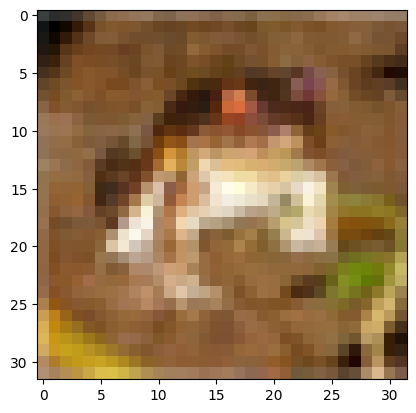

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


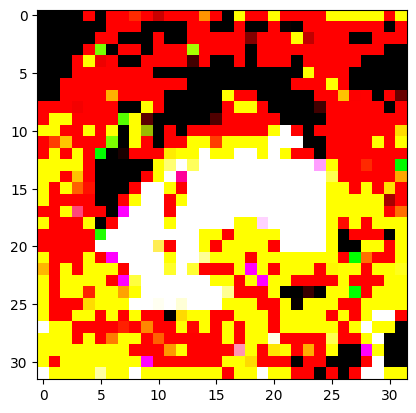

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


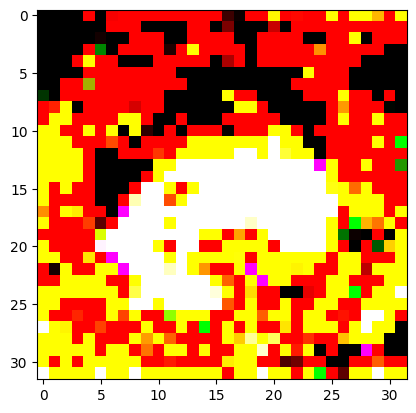

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


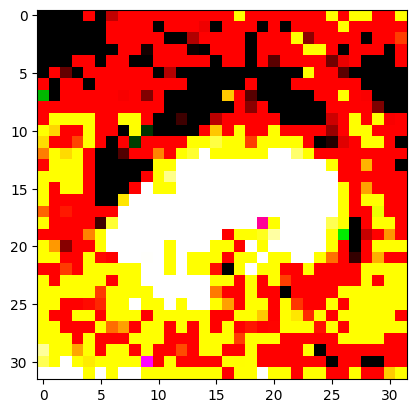

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


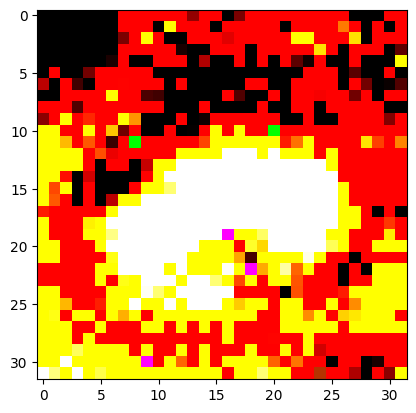

In [142]:
index = 0

plot_cifar10_image(dataset[index])
plot_cifar10_image(dataset_collaborative_512[index])
plot_cifar10_image(dataset_collaborative_256[index])
plot_cifar10_image(dataset_collaborative_128[index])
plot_cifar10_image(dataset_collaborative_064[index])


In [100]:
from PIL import Image

def load_and_transform_image(image_path):
    # 画像の読み込み
    with Image.open(image_path) as img:
        # 画像をNumPy配列に変換
        img_array = np.array(img)

        # RGBA画像の場合、RGBに変換
        if img_array.shape[2] == 4:
            img_array = img_array[:, :, :3]

    return img_array.transpose(2, 0, 1).reshape(3072)


In [143]:
# 関数の使用例
image_path = '/src/data/五条悟_32.png'
gojo_array = load_and_transform_image(image_path)
gojo_scaled = scaler.transform(gojo_array.reshape(1, -1))[0]

image_path = '/src/data/私_32.png'
watashi_array = load_and_transform_image(image_path)
watashi_scaled = scaler.transform(watashi_array.reshape(1, -1))[0]


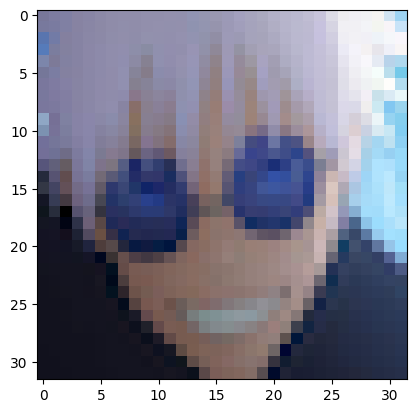

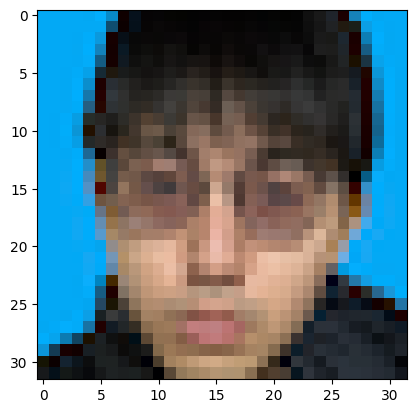

In [144]:
plot_cifar10_image(gojo_array)
plot_cifar10_image(watashi_array)

In [145]:
# 類似度評価
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


In [146]:
print(
    cosine_similarity(
        gojo_scaled,
        watashi_scaled,
    )
)

0.06597506001335951


In [148]:
# 抽象化
gojo_intermediate_512 = pca_512.transform(gojo_scaled.reshape(1, -1))
gojo_intermediate_064 = pca_064.transform(gojo_scaled.reshape(1, -1))

watashi_intermediate_512 = pca_512.transform(watashi_scaled.reshape(1, -1))
watashi_intermediate_064 = pca_064.transform(watashi_scaled.reshape(1, -1))


In [149]:
# 元データの推定
gojo_collaborative_512 = scaler.inverse_transform(gojo_intermediate_512 @ g_512).astype(int)
gojo_collaborative_064 = scaler.inverse_transform(gojo_intermediate_064 @ g_064).astype(int)

watashi_collaborative_512 = scaler.inverse_transform(watashi_intermediate_512 @ g_512).astype(int)
watashi_collaborative_064 = scaler.inverse_transform(watashi_intermediate_064 @ g_064).astype(int)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


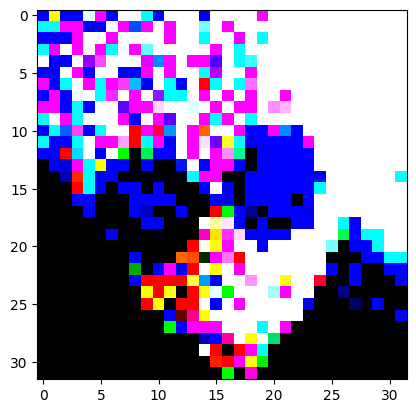

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


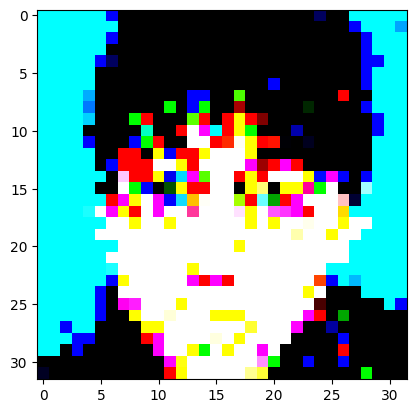

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


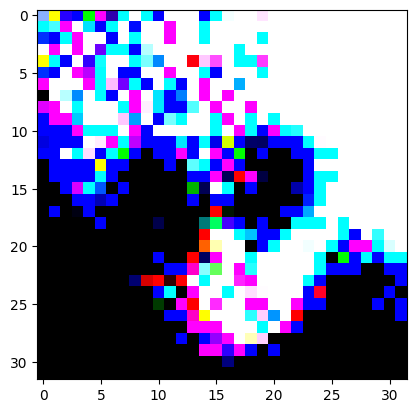

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


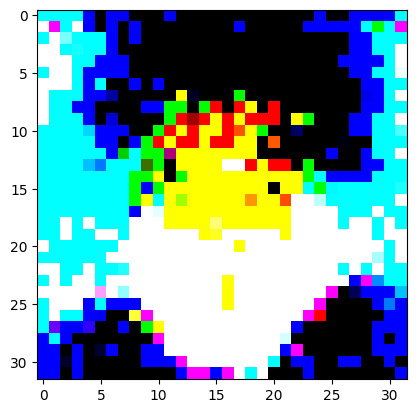

In [150]:
plot_cifar10_image(gojo_collaborative_512)
plot_cifar10_image(watashi_collaborative_512)

plot_cifar10_image(gojo_collaborative_064)
plot_cifar10_image(watashi_collaborative_064)

In [151]:
# スケーリングの実施
gojo_collaborative_512_scaled = scaler.transform(gojo_collaborative_512)[0]
gojo_collaborative_064_scaled = scaler.transform(gojo_collaborative_064)[0]

watashi_collaborative_512_scaled = scaler.transform(watashi_collaborative_512)[0]
watashi_collaborative_064_scaled = scaler.transform(watashi_collaborative_064)[0]


In [152]:
# 評価: 512
print(
    cosine_similarity(
        gojo_collaborative_512_scaled,
        watashi_collaborative_512_scaled,
    )
)

0.03483802975385776


In [153]:
# 評価: 064
print(
    cosine_similarity(
        gojo_collaborative_064_scaled,
        watashi_collaborative_064_scaled,
    )
)

0.0036437806010497288


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


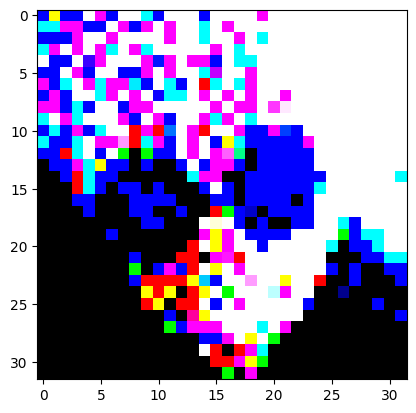

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


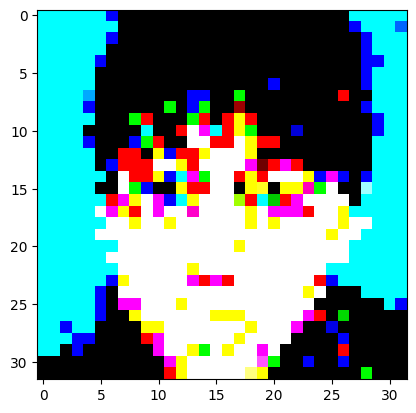

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


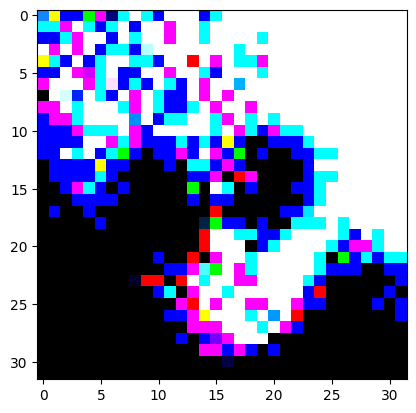

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


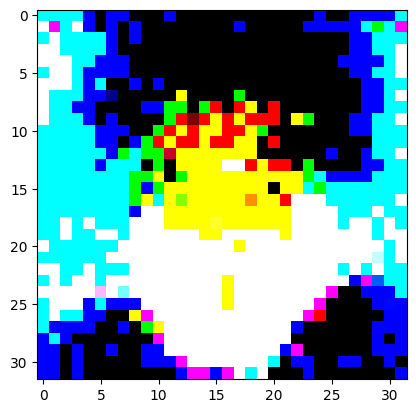

In [154]:
plot_cifar10_image(gojo_collaborative_512_scaled)
plot_cifar10_image(watashi_collaborative_512_scaled)

plot_cifar10_image(gojo_collaborative_064_scaled)
plot_cifar10_image(watashi_collaborative_064_scaled)